In [1]:
from matplotlib import pyplot as plt
import numpy as np
import classifier_utils
from classifier_utils import cnn_model, preprocess_img, get_class
%matplotlib inline
import glob
import os
from skimage import io
from skimage import transform
import keras
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.models import Sequential, Model
import vgg16


/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
Using TensorFlow backend.


## Loading CIFAR10

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170319872/170498071 [============================>.] - ETA: 0s

In [ ]:
print y_train[1] 

### Array details (dimension, type):

In [ ]:
print x_train.shape

In [ ]:
type(x_train)

In [ ]:
print x_train

### Image resizing. Vgg16 takes minimum size of 48x48

In [3]:
x_train_vgg = np.zeros((50000,64,64,3))

for i in range(50000):
    x_train_vgg[i] = transform.resize(x_train[i], (64, 64), order=0)

/usr/local/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [4]:
#1st model
#IMG_SIZE = 32
#2nd model
IMG_SIZE = 64 
NUM_CLASSES = 10

### Reducing amount of pictures

In [ ]:
#1st model
x_train = x_train[0:5000]
y_train = y_train[0:5000]

In [5]:
#2nd model
x_train_vgg = x_train_vgg[0:50000] #bigger value
y_train_vgg = y_train[0:50000]

In [6]:
print (x_train_vgg.shape)

(50000, 64, 64, 3)


In [ ]:
x_train = x_train.astype('float32')/255 # now values are between 0 and 1

### Why already calculated values? By default on .resize

In [7]:
print (x_train_vgg)

[[[[ 0.23137255  0.24313725  0.24705882]
   [ 0.23137255  0.24313725  0.24705882]
   [ 0.16862745  0.18039216  0.17647059]
   ..., 
   [ 0.59607843  0.49019608  0.4       ]
   [ 0.58039216  0.48627451  0.40392157]
   [ 0.58039216  0.48627451  0.40392157]]

  [[ 0.23137255  0.24313725  0.24705882]
   [ 0.23137255  0.24313725  0.24705882]
   [ 0.16862745  0.18039216  0.17647059]
   ..., 
   [ 0.59607843  0.49019608  0.4       ]
   [ 0.58039216  0.48627451  0.40392157]
   [ 0.58039216  0.48627451  0.40392157]]

  [[ 0.0627451   0.07843137  0.07843137]
   [ 0.0627451   0.07843137  0.07843137]
   [ 0.          0.          0.        ]
   ..., 
   [ 0.46666667  0.3254902   0.19607843]
   [ 0.47843137  0.34117647  0.22352941]
   [ 0.47843137  0.34117647  0.22352941]]

  ..., 
  [[ 0.70588235  0.54509804  0.37647059]
   [ 0.70588235  0.54509804  0.37647059]
   [ 0.67843137  0.48235294  0.16470588]
   ..., 
   [ 0.38039216  0.24313725  0.13333333]
   [ 0.3254902   0.20784314  0.13333333]
   [ 0.

### Examples from training set (64x64 and 32x32)

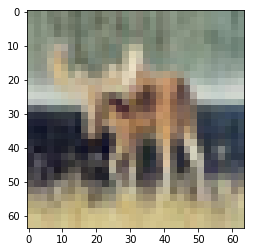

In [8]:
single_image = x_train_vgg[28:29]
plt.imshow(single_image[0])         

In [ ]:
single_image = x_train[300:301]
plt.imshow(single_image[0])   

### Zdjecie warstwy: include_top=False

In [ ]:
#first_model = cnn_model(IMG_SIZE,NUM_CLASSES)

In [9]:
second_model = keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=(64,64,3), pooling=max)

57737216/58889256 [============================>.] - ETA: 0s

### Choose model (remember to set NUM_CLASSES)

In [10]:
#model = first_model
model = second_model

In [11]:
model.layers

In [ ]:
model.layers[2]

### Setting all layers to trainable

In [12]:
for layer in model.layers: layer.trainable=True

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

### Alternative way to add last layer and activation 

In [14]:
#model.add(Dense(NUM_CLASSES, activation='softmax')) .add doesn't work for VGG16

last = model.output

x = Flatten()(last)
preds = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(model.input, preds)

In [15]:
model.layers

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

### Set optimizer for tweaks (leraning rate lr=0.001 to lr=0.0001) !Unquote Adam!

In [17]:
Adam=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [18]:
model.compile(optimizer=Adam,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
#1st model
#model.fit(x_train, y_train, batch_size=128, epochs=10)
#2nd model
model.fit(x_train_vgg, y_train_vgg, batch_size=128, epochs=2)

Epoch 1/2
50000/50000 [==============================] - 369s - loss: 0.5970 - acc: 0.7935   
Epoch 2/2
50000/50000 [==============================] - 306s - loss: 0.2689 - acc: 0.9058   


### Set test size to 64x64

In [20]:
x_test_vgg = np.zeros((10000,64,64,3))

for i in range(10000):
    x_test_vgg[i] = transform.resize(x_test[i], (64, 64), order=0)

/usr/local/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [21]:
print (x_test_vgg.shape)

(10000, 64, 64, 3)


In [22]:
model.evaluate(x_test_vgg, y_test)

10000/10000 [==============================] - 22s    


[0.29330722105503082, 0.89910000000000001]